## 单变量线性回归Linear Regression with One Variable

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path =  '1vector.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


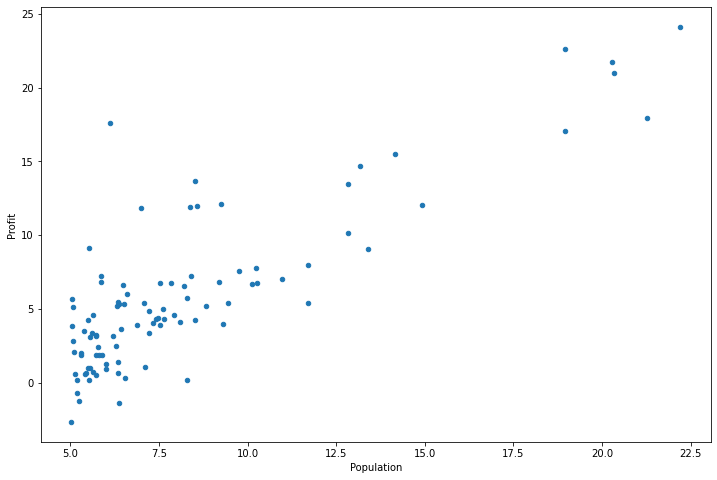

In [6]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

创建以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [7]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [11]:
data.insert(0, 'Ones', 1)#  b  向量化计算
data.shape

(97, 3)

In [12]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#X是所有行，最后一列

In [15]:
X.head()#head()是观察前5行

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [16]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [17]:
#代价函数是是numpy矩阵，需要转换X和Y，然后才能使用它们
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))#初始化theta

In [18]:
theta

matrix([[0, 0]])

In [19]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [20]:
computeCost(X, y, theta)

32.072733877455676

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [21]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])#将多维数组转为一维数组  作为参数向量
    cost = np.zeros(iters)#初始化cost
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):#分别对每个θ进行更新
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp#同步更新θ
        cost[i] = computeCost(X, y, theta)#每次迭代，计算一次cost
        
    return theta, cost

In [27]:
alpha = 0.01
iters = 1000
final_theta, cost_data = gradientDescent(X, y, theta, alpha, iters)
final_theta#最终θ参数值

matrix([[-3.24140214,  1.1272942 ]])

In [45]:
cost_data#每次迭代的loss(代价函数误差)值

array([6.73719046, 5.93159357, 5.90115471, 5.89522859, 5.89009494,
       5.88500416, 5.87993248, 5.87487909, 5.86984391, 5.86482687,
       5.85982789, 5.85484692, 5.84988389, 5.84493874, 5.8400114 ,
       5.83510181, 5.8302099 , 5.82533562, 5.82047889, 5.81563965,
       5.81081784, 5.8060134 , 5.80122627, 5.79645638, 5.79170367,
       5.78696808, 5.78224955, 5.77754801, 5.77286341, 5.76819568,
       5.76354477, 5.75891061, 5.75429313, 5.7496923 , 5.74510803,
       5.74054027, 5.73598897, 5.73145406, 5.72693549, 5.72243319,
       5.71794711, 5.71347718, 5.70902336, 5.70458558, 5.70016379,
       5.69575792, 5.69136792, 5.68699373, 5.6826353 , 5.67829257,
       5.67396548, 5.66965398, 5.665358  , 5.6610775 , 5.65681242,
       5.6525627 , 5.64832829, 5.64410913, 5.63990517, 5.63571635,
       5.63154261, 5.62738391, 5.6232402 , 5.6191114 , 5.61499748,
       5.61089837, 5.60681403, 5.60274441, 5.59868944, 5.59464907,
       5.59062326, 5.58661195, 5.58261509, 5.57863263, 5.57466

In [28]:
computeCost(X, y, final_theta)#误差值降低了到了4.5！

4.515955503078912

绘制线性模型以及数据，直观地看出它的拟合。

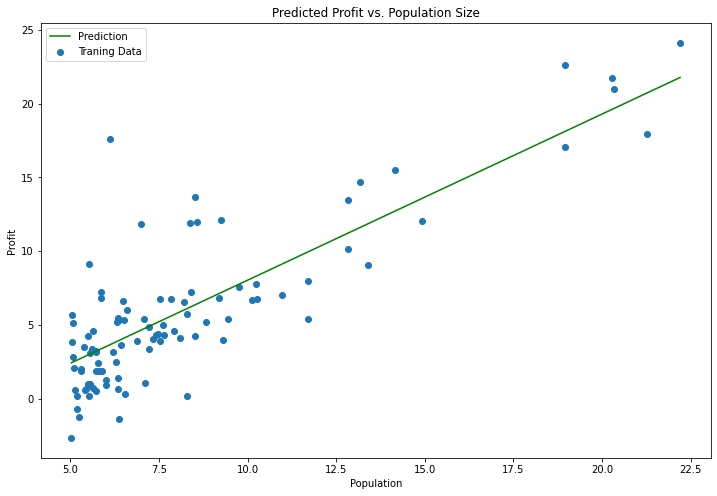

In [49]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)#取x数据
linear = final_theta[0, 0] + (final_theta[0, 1] * x)# kx+b

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,linear, 'green', label='Prediction')#x数据 ，kx+b 线 ,绿色，名字
ax.scatter(data.Population, data.Profit, label='Traning Data')#数据点 x,y ,名字
ax.legend(loc=2)
ax.set_xlabel('Population')#x轴名字
ax.set_ylabel('Profit')#y轴名字
ax.set_title('Predicted Profit vs. Population Size')#图标标题
plt.show()

梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

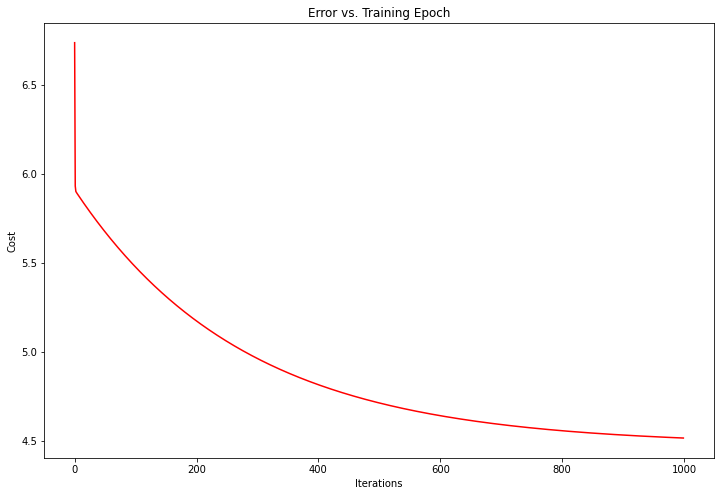

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost_data, 'r')#绘制每次迭代的cost_data数据
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()